In [45]:
import numpy as np
import random
import pandas as pd
from math import sqrt

# decleare 2 random arrays with x and y values
df = pd.read_csv(r"C:\Users\Parth_Coding\Desktop\weatherHistory.csv")

x_column_name = "Temperature (C)"
y_column_name = "Humidity"

x_values = df[x_column_name].to_numpy()[:100]
y_values = df[y_column_name].to_numpy()[:100]


print(x_values)
print(y_values)



[ 9.47222222  9.35555556  9.37777778  8.28888889  8.75555556  9.22222222
  7.73333333  8.77222222 10.82222222 13.77222222 16.01666667 17.14444444
 17.8        17.33333333 18.87777778 18.91111111 15.38888889 15.55
 14.25555556 13.14444444 11.55       11.18333333 10.11666667 10.2
 10.42222222  9.91111111 11.18333333  7.15555556  6.11111111  6.78888889
  7.26111111  7.8         9.87222222 12.22222222 15.09444444 17.35555556
 19.00555556 20.04444444 21.05       21.18333333 20.11666667 20.21666667
 20.         17.8        16.06111111 15.02222222 14.42222222 14.25555556
 13.77222222 13.28333333  8.63333333 11.25       11.18333333 10.69444444
 11.11111111 11.11111111 12.16666667 12.75555556 13.83888889 16.18333333
 17.51666667 17.38333333 17.36111111 17.20555556 15.63333333 13.57777778
 10.91111111  8.8         8.96111111  8.2         7.68888889  7.76666667
  8.2         8.17777778  7.31111111  7.64444444  6.62222222  6.68333333
  6.08888889  6.06666667  6.14444444  7.13333333  7.20555556  7.

In [46]:
# predicting values for slope and intercept

def findingSlopeIntercept(x_values, y_values):
    x_mean = np.mean(x_values)
    y_mean = np.mean(y_values)

    numerator = np.dot((x_values - x_mean),(y_values - y_mean))
    denominator = np.sum((x_values - x_mean)**2)

    slope = numerator / denominator
    intercept = y_mean - slope*x_mean

    return slope, intercept

slope, intercept = findingSlopeIntercept(x_values, y_values)

y_pred_values = np.array(intercept + slope*x_values)
print(y_pred_values)  

[0.81100639 0.81460806 0.81392203 0.84753755 0.83313089 0.81872424
 0.86468832 0.83261637 0.76933001 0.67825939 0.60897026 0.57415418
 0.55391627 0.56832292 0.52064376 0.51961472 0.62835063 0.62337691
 0.66333822 0.69763977 0.74686249 0.75818201 0.79111149 0.78853888
 0.78167857 0.79745728 0.75818201 0.88252513 0.91476859 0.89384464
 0.87926648 0.86263023 0.79865784 0.72611005 0.63744055 0.56763689
 0.51669909 0.48462714 0.45358423 0.44946805 0.48239753 0.47931039
 0.4859992  0.55391627 0.6075982  0.63967015 0.65819298 0.66333822
 0.67825939 0.69335207 0.83690406 0.75612391 0.75818201 0.77327469
 0.76041161 0.76041161 0.72782513 0.70964531 0.6762013  0.60382503
 0.56266316 0.56677935 0.56746538 0.5722676  0.62080429 0.68426216
 0.76658589 0.83175883 0.82678511 0.85028167 0.86606038 0.86365927
 0.85028167 0.8509677  0.87772291 0.86743245 0.89898987 0.89710329
 0.91545462 0.91614065 0.91373954 0.88321116 0.88098156 0.86983355
 0.82867169 0.79591371 0.79814331 0.76178367 0.79111149 0.7626

In [47]:
#calcualting the root mean sqaure error

def rootMeanSquareError(actual_values, predicted_values):
    sum_error = 0.0
    for y, y_pred in zip(actual_values, predicted_values):
        pred_error = y_pred - y
        sum_error += (pred_error**2)
    mean_error = sum_error/float(len(actual_values))
    return sqrt(mean_error)

# _________________________________--replace x values with predicted____________________-
rmse = rootMeanSquareError(y_values, y_pred_values)

print(rmse)


0.08996207447870588


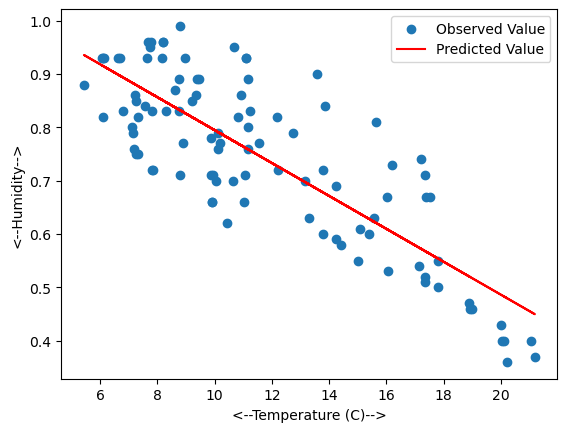

In [48]:
import matplotlib.pyplot as plt

plt.scatter(x_values, y_values, label='Observed Value')
plt.plot(x_values, y_pred_values, label='Predicted Value', color='red')
plt.xlabel('<--'+x_column_name+'-->')
plt.ylabel('<--'+y_column_name+'-->')
plt.legend()
plt.show()

In [49]:
# taking values from csv taking 